# Dataset analysis 1

This code contains analysis for the terrorism target types, weapon types, locations/regions and kindnapping incidents.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("ggplot") 

In [2]:
data = pd.read_csv("final_data.csv", encoding="iso-8859-1", low_memory=False)

In [3]:
pd.options.display.max_columns = None

list(data.columns)

['Unnamed: 0',
 'eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'country_txt',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1_txt',
 'attacktype2_txt',
 'attacktype3_txt',
 'targtype1_txt',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1_txt',
 'targtype2_txt',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2_txt',
 'targtype3_txt',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 'claimed',
 'claimmode_txt',
 'claim2',
 'claimmode2_txt',
 'claim3',
 'claimmode3_txt',
 'compclaim',
 'weaptype1_txt',
 'weapsubtype1_txt',
 'weaptype2_txt',
 'weapsubtype2_txt',
 'weaptype3_txt',
 'weapsubtype3_txt',
 'weaptype4_txt',
 'w

In [4]:
# Remove the unnecessary 'Unnamed' column
data = data.drop('Unnamed: 0', axis=1)

In [5]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,country_txt,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative_txt,multiple,success,suicide,attacktype1_txt,attacktype2_txt,attacktype3_txt,targtype1_txt,targsubtype1_txt,corp1,target1,natlty1_txt,targtype2_txt,targsubtype2_txt,corp2,target2,natlty2_txt,targtype3_txt,targsubtype3_txt,corp3,target3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode_txt,claim2,claimmode2_txt,claim3,claimmode3_txt,compclaim,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,weaptype3_txt,weapsubtype3_txt,weaptype4_txt,weapsubtype4_txt,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent_txt,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome_txt,nreleased,related
0,197000000001,1970,7,2,NaN,0,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,1,1,1,0.0,NaN,0.0,1,0,Assassination,NaN,NaN,Private Citizens & Property,Named Civilian,NaN,Julio Guzman,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,197000000002,1970,0,0,NaN,0,Mexico,North America,Federal,Mexico City,19.371887,-99.086624,1.0,0.0,1,1,1,0.0,NaN,0.0,1,0,Hostage Taking (Kidnapping),NaN,NaN,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,197001000001,1970,1,0,NaN,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0.0,1,1,1,0.0,NaN,0.0,1,0,Assassination,NaN,NaN,Journalists & Media,Radio Journalist/Staff/Facility,Voice of America,Employee,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,197001000002,1970,1,0,NaN,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0.0,1,1,1,0.0,NaN,0.0,1,0,Bombing/Explosion,NaN,NaN,Government (Diplomatic),Embassy/Consulate,NaN,U.S. Embassy,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosives,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,197001000003,1970,1,0,NaN,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0.0,1,1,1,NaN,NaN,0.0,1,0,Facility/Infrastructure Attack,NaN,NaN,Government (Diplomatic),Embassy/Consulate,NaN,U.S. Consulate,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To reduce memory usage, we'll downcast the integer and float types and convert most of the object types to categorical type.

In [6]:
for col in data.select_dtypes(include=['int64']):
    data[col] = pd.to_numeric(data[col], downcast ='integer')
    
for col in data.select_dtypes(include=['float']):
    data[col] = pd.to_numeric(data[col], downcast ='float')

print(data.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 92 columns):
eventid               181691 non-null int64
iyear                 181691 non-null int16
imonth                181691 non-null int8
iday                  181691 non-null int8
approxdate            9239 non-null object
extended              181691 non-null int8
country_txt           181691 non-null object
region_txt            181691 non-null object
provstate             181270 non-null object
city                  181257 non-null object
latitude              177135 non-null float32
longitude             177134 non-null float32
specificity           181685 non-null float32
vicinity              181656 non-null float32
crit1                 181691 non-null int8
crit2                 181691 non-null int8
crit3                 181691 non-null int8
doubtterr             167906 non-null float32
alternative_txt       29011 non-null object
multiple              181690 non-null float32


In [7]:
categorical_cols = []
for col in data.select_dtypes(include=['object']):
    num_unique_values = len(data[col].unique())
    num_total_values = len(data[col])
    prop = num_unique_values / num_total_values
    if prop < 0.5:
        if col not in ['approxdate', 'motive', 'related']:  # This is not a categorical value
            categorical_cols.append(col)
            print(col, num_unique_values, str(round(prop*100))+'%')

country_txt 205 0%
region_txt 12 0%
provstate 2833 2%
city 36298 20%
alternative_txt 6 0%
attacktype1_txt 9 0%
attacktype2_txt 10 0%
attacktype3_txt 9 0%
targtype1_txt 22 0%
targsubtype1_txt 113 0%
corp1 32249 18%
target1 83296 46%
natlty1_txt 216 0%
targtype2_txt 23 0%
targsubtype2_txt 108 0%
corp2 2631 1%
target2 4981 3%
natlty2_txt 159 0%
targtype3_txt 21 0%
targsubtype3_txt 93 0%
corp3 416 0%
target3 717 0%
natlty3_txt 111 0%
gname 3537 2%
gsubname 1174 1%
gname2 434 0%
gsubname2 61 0%
gname3 117 0%
gsubname3 15 0%
claimmode_txt 11 0%
claimmode2_txt 10 0%
claimmode3_txt 9 0%
weaptype1_txt 12 0%
weapsubtype1_txt 31 0%
weaptype2_txt 12 0%
weapsubtype2_txt 29 0%
weaptype3_txt 11 0%
weapsubtype3_txt 23 0%
weaptype4_txt 6 0%
weapsubtype4_txt 17 0%
propextent_txt 5 0%
divert 144 0%
kidhijcountry 217 0%
hostkidoutcome_txt 8 0%


In [8]:
for cols in categorical_cols:
    data[cols] = data[cols].astype('category')

print(data.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 92 columns):
eventid               181691 non-null int64
iyear                 181691 non-null int16
imonth                181691 non-null int8
iday                  181691 non-null int8
approxdate            9239 non-null object
extended              181691 non-null int8
country_txt           181691 non-null category
region_txt            181691 non-null category
provstate             181270 non-null category
city                  181257 non-null category
latitude              177135 non-null float32
longitude             177134 non-null float32
specificity           181685 non-null float32
vicinity              181656 non-null float32
crit1                 181691 non-null int8
crit2                 181691 non-null int8
crit3                 181691 non-null int8
doubtterr             167906 non-null float32
alternative_txt       29011 non-null category
multiple              181690 non-nul

Due to the dataset's particularities we will do the analysis in two parts: before and after 1997. **NB!** The data for 1993 is missing from this dataset.

In [9]:
data_pre97 = data[data.iyear < 1997]
data_post97 = data[data.iyear >=1997]

In [10]:
# Check if the split is correct
len(data_pre97) + len(data_post97) == len(data)

True

## Incident times and locations

This section will analyze the incident occurences over time and how they progress in different regions of the world.

In [11]:
# This will rotate the x-labels of a plot 
def fix_labels(plot, angle=90):
    for item in plot.get_xticklabels():
        item.set_rotation(angle)

### 1970 - 1997

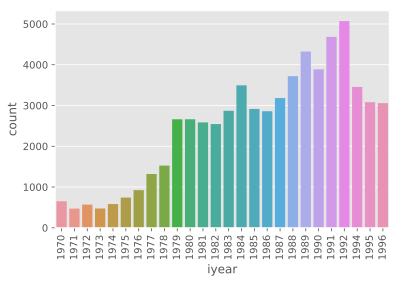

In [12]:
p1 = sns.countplot(data_pre97.iyear)
fix_labels(p1)

We can see that there is a fluctuating but significant increase in the number of incidents from about 1979 up til 1992 and then a decrease in the last 3 years.

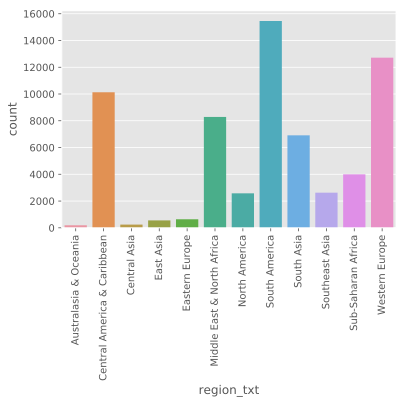

In [13]:
p2 = sns.countplot(data_pre97.region_txt)
fix_labels(p2)

The most eventful regions in this period are South-Central America, Western Europe and the Middle-East and North Africa. There is also a significant amount of incidents in South(east) Asia, while Central-East Asia, Oceania and Eastern Europe are rather peaceful regions.

### 1997 - 2017

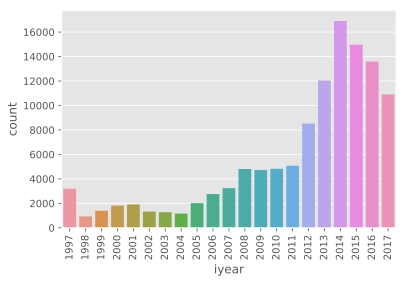

In [14]:
p3 = sns.countplot(data_post97.iyear)
fix_labels(p3)

This time period starts with a decline of terrorism incidents, the number of which does not increase above the 1997 level for 10 years. A remarkable, exponential growth of incidents starts from about 2011 and peaks at 2014 and then steadily declines until 2017.

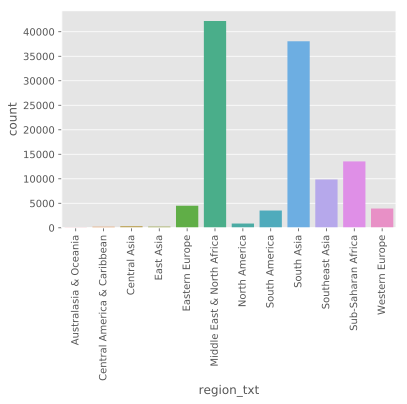

In [15]:
p4 = sns.countplot(data_post97.region_txt)
fix_labels(p4)

Post 1997, the most dangerous regions are the Middle East, South Asia and Sub-Saharan Africa, which has risen almost to the level of South America before 1997. Compared to the previous period, Western Europe seems to have calmed and Central and South America almost stabilized. 

#### Top years

In [16]:
data.iyear.value_counts().head()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
Name: iyear, dtype: int64

#### Top pre-1997 countries

In [17]:
data_pre97.country_txt.value_counts().head(10)

Peru              5955
Colombia          5395
El Salvador       5318
United Kingdom    3957
Spain             2678
India             2676
Turkey            2313
Chile             2260
United States     2237
France            2061
Name: country_txt, dtype: int64

#### Top post-1997 countries

In [18]:
data_post97.country_txt.value_counts().head(10)

Iraq           24515
Pakistan       12833
Afghanistan    12618
India           9284
Philippines     5026
Somalia         3997
Nigeria         3866
Thailand        3651
Yemen           3283
Colombia        2911
Name: country_txt, dtype: int64

## Plotting on map

We will use geopandas to plot incident distribution between countries

In [19]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

In [20]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [21]:
counts_pre = data_pre97.country_txt.value_counts()
counts_post = data_post97.country_txt.value_counts()
world['terrorism_rate_pre97'] = world.name.apply(lambda n: counts_pre[n]  if n in counts_pre else 0)
world['terrorism_rate_post97'] = world.name.apply(lambda n: counts_post[n]  if n in counts_post else 0)

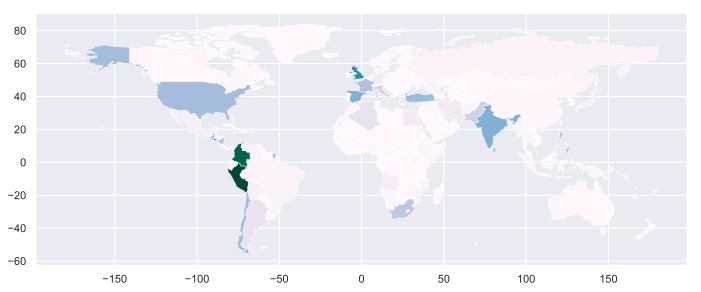

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
world.plot(column='terrorism_rate_pre97', cmap='PuBuGn', linewidth=0.5) 

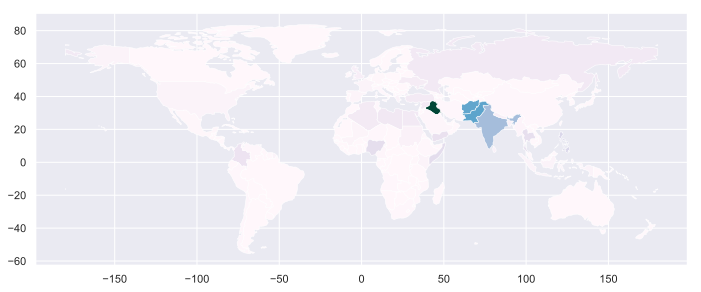

In [23]:
world.plot(column='terrorism_rate_post97', cmap='PuBuGn', linewidth=0.5) 

## Target types

We will analyze the variable 'targtype1_txt' in this section. The reason why we don't analyze any of the subtypes is that this variable alone is informative enough and for most of the incidents the subtypes are missing values.

In [24]:
data_post97.targtype1_txt.value_counts()

Private Citizens & Property       32169
Military                          18925
Police                            17177
Government (General)              13045
Business                           9716
Unknown                            5246
Transportation                     3447
Religious Figures/Institutions     3272
Educational Institution            3076
Utilities                          2417
Terrorists/Non-State Militia       2350
Journalists & Media                1522
Government (Diplomatic)            1413
Violent Political Party            1194
NGO                                 706
Telecommunication                   588
Airports & Aircraft                 400
Tourists                            211
Food or Water Supply                160
Maritime                            157
Other                               122
Abortion Related                     68
Name: targtype1_txt, dtype: int64

In [25]:
# Plots the heatmap of the relative counts between two variables var1 and var2
# ispre97 denotes whether we use the pre-1997 or post-1997 data
# filter_var1 can be a minimal value for var1 in order to filter out the most significant values
def crosstab(var1, var2, ispre97, filter_var1=None):
    data = data_pre97 if ispre97 else data_post97
    var1_counts = data[var1].value_counts()
    
    if filter_var1 != None and type(filter_var1) == int:
        var1_counts = var1_counts[var1_counts >= filter_var1]
    
    # There is usually 'Unknown' among the categorical values
    if 'Unknown' in var1_counts:
        var1_counts = var1_counts.drop('Unknown')
    
    var1_data = data[data[var1].isin(var1_counts.index)]
    ct = pd.crosstab(var1_data[var1], var1_data[var2]).apply(lambda r: r/r.sum(), axis=1)
    sns.heatmap(ct)    

### 1970 - 1997

In [26]:
len(data_pre97[data_pre97.targtype1_txt.notna()]) / len(data_pre97)

1.0

We can see that in 100% of the cases, targtype1_txt exists in the data.

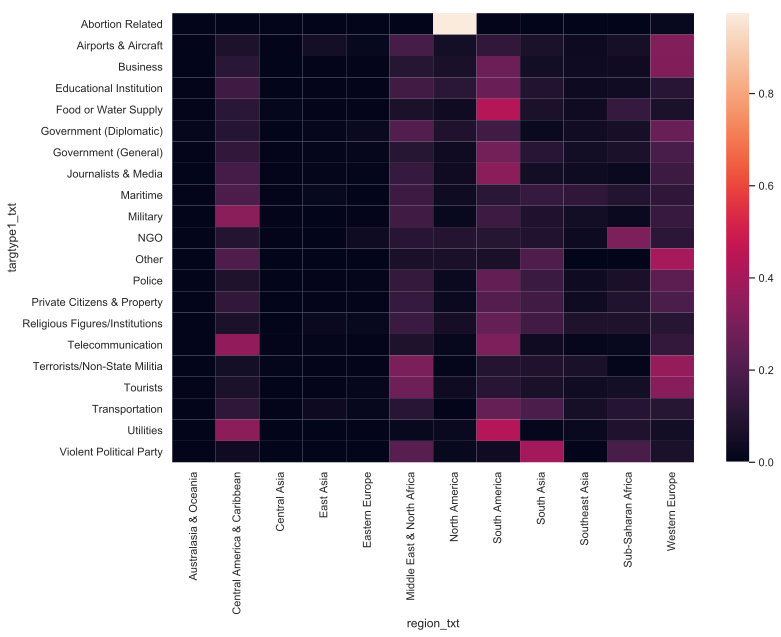

In [29]:
crosstab('targtype1_txt', 'region_txt', True)

From the heatmap, we can see that the in Central America, the military is the most attacked target along with telecommunication and energy-producing facilities. In South America and Western Europe, civilians and public places are targeted more often, while there is a significant correlation in North America with abortion related institutions.

### 1997 - 2017

In [30]:
len(data_post97[data_post97.targtype1_txt.notna()]) / len(data_post97)

1.0

As before, the targtype1_txt value exists also for all post-1997 incidents.

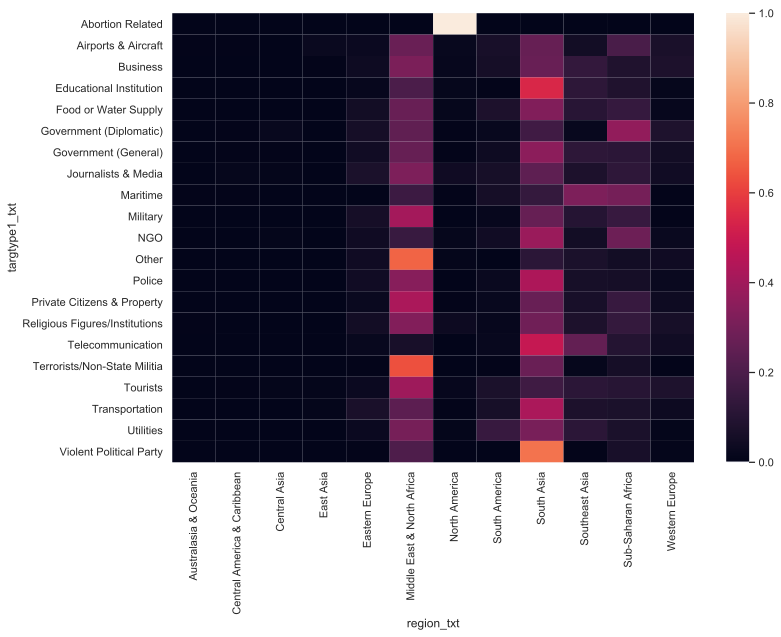

In [31]:
crosstab('targtype1_txt', 'region_txt', False)

Same as before, abortion related institutes is the only significant type that is heavily attacked in North America. We can see that in the Middle East, almost every type of facility is targeted very often, as well as in South Asia.

Let's look at the abortion case more specficially.

In [34]:
data_post97[data_post97.region_txt == 'North America'].targtype1_txt.value_counts()

Private Citizens & Property       195
Business                          158
Religious Figures/Institutions    106
Government (General)               86
Abortion Related                   68
Journalists & Media                64
Police                             52
Educational Institution            44
Military                           24
Utilities                          19
Transportation                     18
NGO                                 9
Airports & Aircraft                 8
Government (Diplomatic)             7
Unknown                             6
Tourists                            4
Violent Political Party             3
Telecommunication                   2
Food or Water Supply                2
Other                               1
Maritime                            1
Terrorists/Non-State Militia        1
Name: targtype1_txt, dtype: int64

In [35]:
data[data.targtype1_txt == 'Abortion Related'].region_txt.value_counts()

North America                  258
Western Europe                   4
South America                    1
Sub-Saharan Africa               0
Southeast Asia                   0
South Asia                       0
Middle East & North Africa       0
Eastern Europe                   0
East Asia                        0
Central Asia                     0
Central America & Caribbean      0
Australasia & Oceania            0
Name: region_txt, dtype: int64

It appears that while the abortion related attacks were only the 5th frequent in North America post 1997, the region still holds 258 (i.e. 98%) of all abortion related incidents.

## Weapon types

We'll look at some correlations for the 'weaptype1_txt' and 'weapsubtype1_txt' variables. We don't look at other weapon type or subtype variables as those have missing values for most of the incidents.

In [36]:
data.weaptype1_txt.value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

In [37]:
data.weapsubtype1_txt.value_counts()

Unknown Explosive Type                       44980
Unknown Gun Type                             33137
Automatic or Semi-Automatic Rifle            17412
Vehicle                                       9900
Projectile (rockets, mortars, RPGs, etc.)     9848
Other Explosive Type                          7304
Handgun                                       6704
Grenade                                       5167
Landmine                                      4251
Arson/Fire                                    4141
Suicide (carried bodily by human being)       3245
Remote Trigger                                2719
Knife or Other Sharp Object                   2585
Sticky Bomb                                   1594
Molotov Cocktail/Petrol Bomb                  1239
Dynamite/TNT                                  1222
Rifle/Shotgun (non-automatic)                 1175
Gasoline or Alcohol                            844
Time Fuse                                      792
Pipe Bomb                      

### 1970-1997

In [38]:
len(data_pre97[data_pre97.weaptype1_txt.notna()]) / len(data_pre97)

1.0

In [39]:
len(data_pre97[data_pre97.weapsubtype1_txt.notna()]) / len(data_pre97)

0.8314881044938579

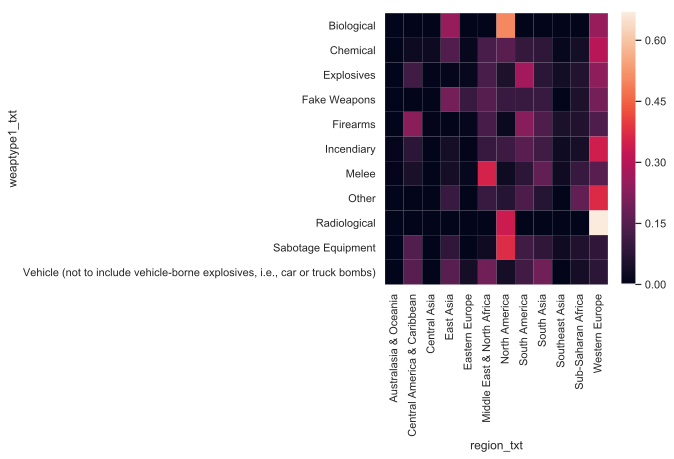

In [46]:
sns.set(rc={'figure.figsize':(5,5)})
crosstab('weaptype1_txt', 'region_txt', True)

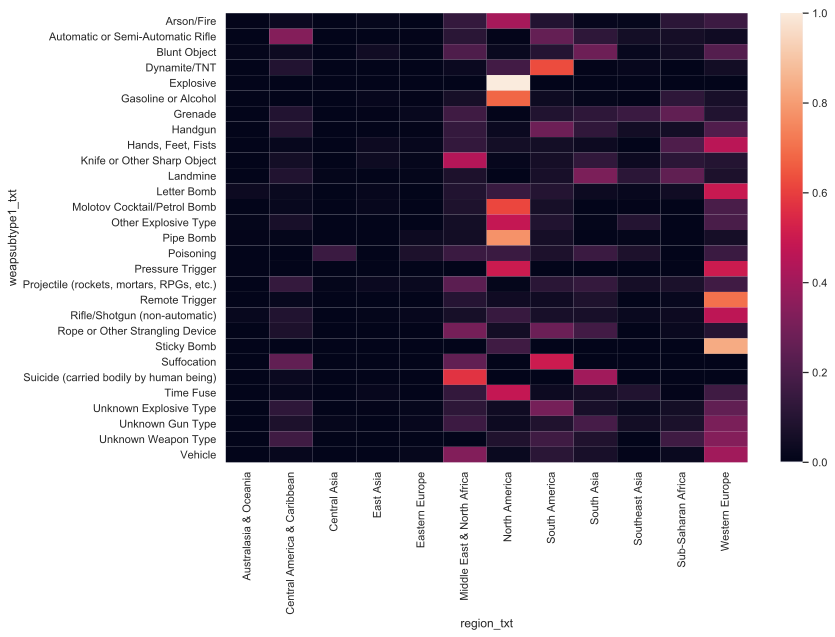

In [41]:
crosstab('weapsubtype1_txt', 'region_txt', True)

### 1997 - 2017

In [42]:
len(data_post97[data_post97.weaptype1_txt.notna()]) / len(data_post97)

1.0

In [43]:
len(data_post97[data_post97.weapsubtype1_txt.notna()]) / len(data_post97)

0.9153951661682896

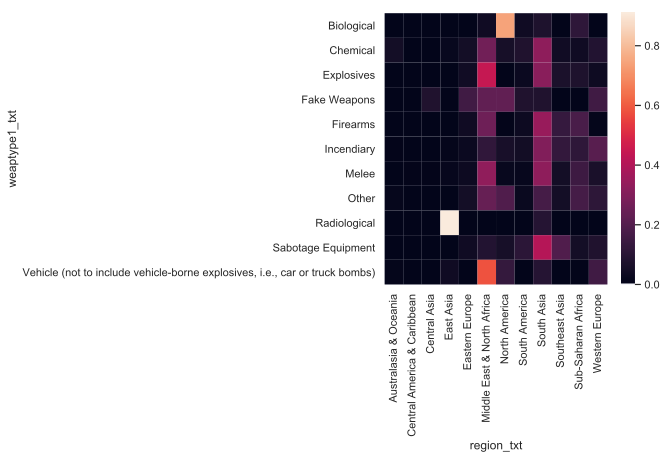

In [47]:
sns.set(rc={'figure.figsize':(5,5)})
crosstab('weaptype1_txt', 'region_txt', False)

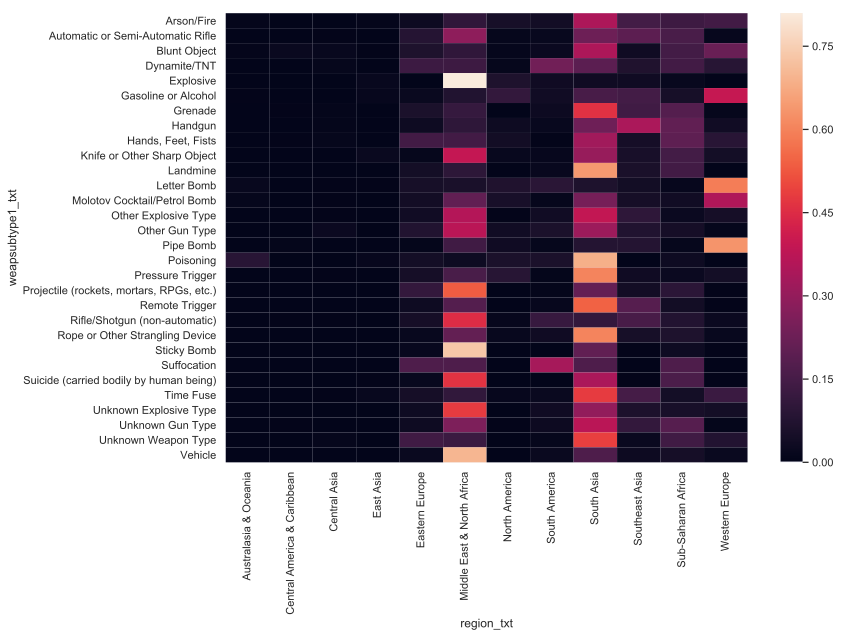

In [45]:
crosstab('weapsubtype1_txt', 'region_txt', False)

From the heatmaps of both time periods, we can see that all kinds of explosives are the most often used in terror attacks. We can confirm this by looking at the overall value counts:

In [48]:
data.weaptype1_txt.value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

## Attack groups

We'll look at important correlations for attack groups in this section. We also limit this analysis to the variable 'gname' as we can see from the beginning that there are a lot of unknown values in here and a lot of missing values in the other (sub)names.

### 1970 - 1997

In [49]:
data_pre97.gname.value_counts()

Unknown                                                               21322
Shining Path (SL)                                                      4462
Farabundo Marti National Liberation Front (FMLN)                       3351
Irish Republican Army (IRA)                                            2620
Basque Fatherland and Freedom (ETA)                                    1733
Palestinians                                                           1094
National Liberation Army of Colombia (ELN)                             1013
Kurdistan Workers' Party (PKK)                                         1009
Revolutionary Armed Forces of Colombia (FARC)                          1004
New People's Army (NPA)                                                 968
Nicaraguan Democratic Force (FDN)                                       895
Liberation Tigers of Tamil Eelam (LTTE)                                 894
Manuel Rodriguez Patriotic Front (FPMR)                                 829
Sikh Extremi

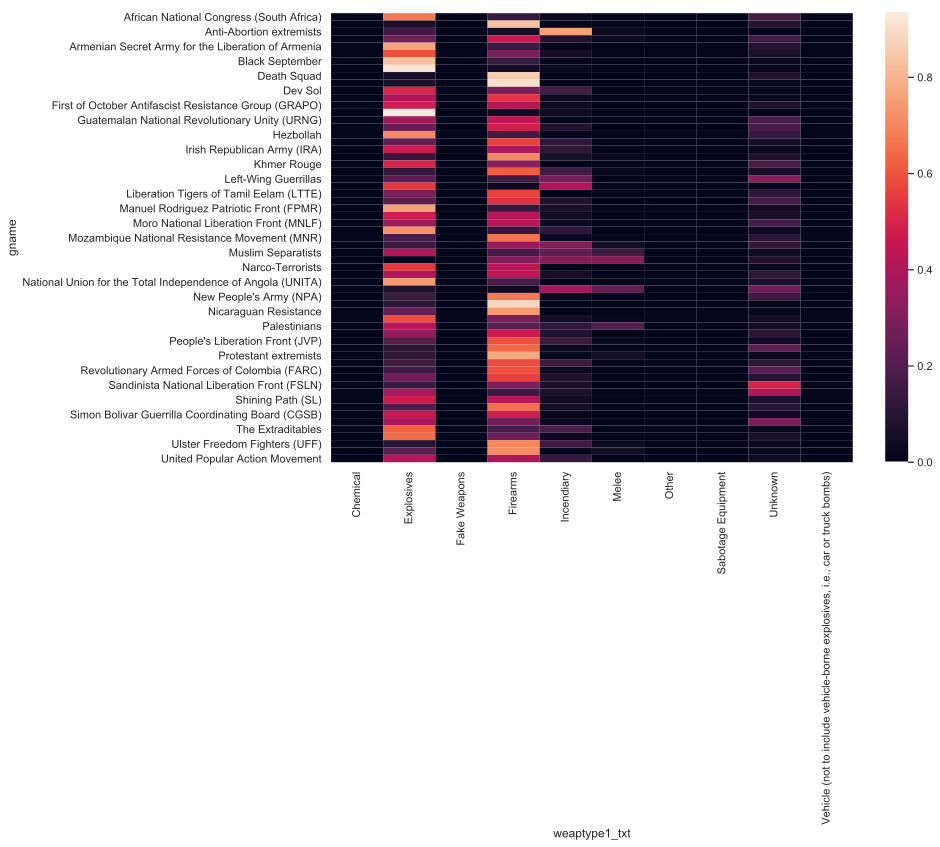

In [51]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# There are too many distinct names, filter them by frequency over 100
crosstab('gname', 'weaptype1_txt', True, filter_var1=100)

We now want to look at how many casualties and wounded are the groups responsible for. We'll look at the most prevalent groups (with frequency >= 100).

In [52]:
top_groups_pre = data_pre97.gname.value_counts()
top_groups_pre = top_groups_pre[top_groups_pre >= 100]
top_groups_pre = top_groups_pre.drop('Unknown')

sums_pre = data_pre97.groupby('gname').sum()[['nkill', 'nwound', 'nkillter', 'nwoundte']]
sums_pre = sums_pre.select(lambda idx: idx in top_groups_pre).sort_values(by='nkill', ascending=False)
sums_pre = pd.DataFrame(sums_pre)
sums_pre.reset_index(inplace=True)
sums_pre.head()

C:\Users\MariLiis\Anaconda3\envs\py33\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


,gname,nkill,nwound,nkillter,nwoundte
0,Shining Path (SL),11418.0,2870.0,113.0,4.0
1,Farabundo Marti National Liberation Front (FMLN),8065.0,4065.0,84.0,1.0
2,Liberation Tigers of Tamil Eelam (LTTE),7490.0,5508.0,56.0,0.0
3,Nicaraguan Democratic Force (FDN),6662.0,734.0,4.0,0.0
4,Kurdistan Workers' Party (PKK),3197.0,1219.0,10.0,0.0


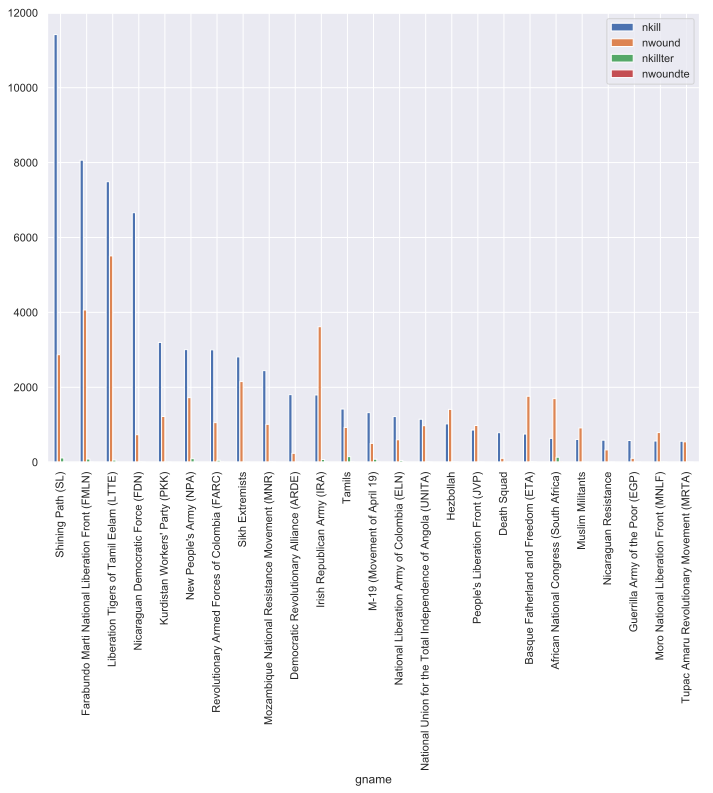

In [53]:
sums_pre[:25].plot(x='gname', y=['nkill', 'nwound','nkillter', 'nwoundte'], kind="bar")

The most fatal group in this time period is the Shining Path - a communist organization in Peru which initiated an internal conflict in peru in the 1980s and is considered a terrorist organization due to their attacks against civilians, government officials and many others.

### 1997 - 2017

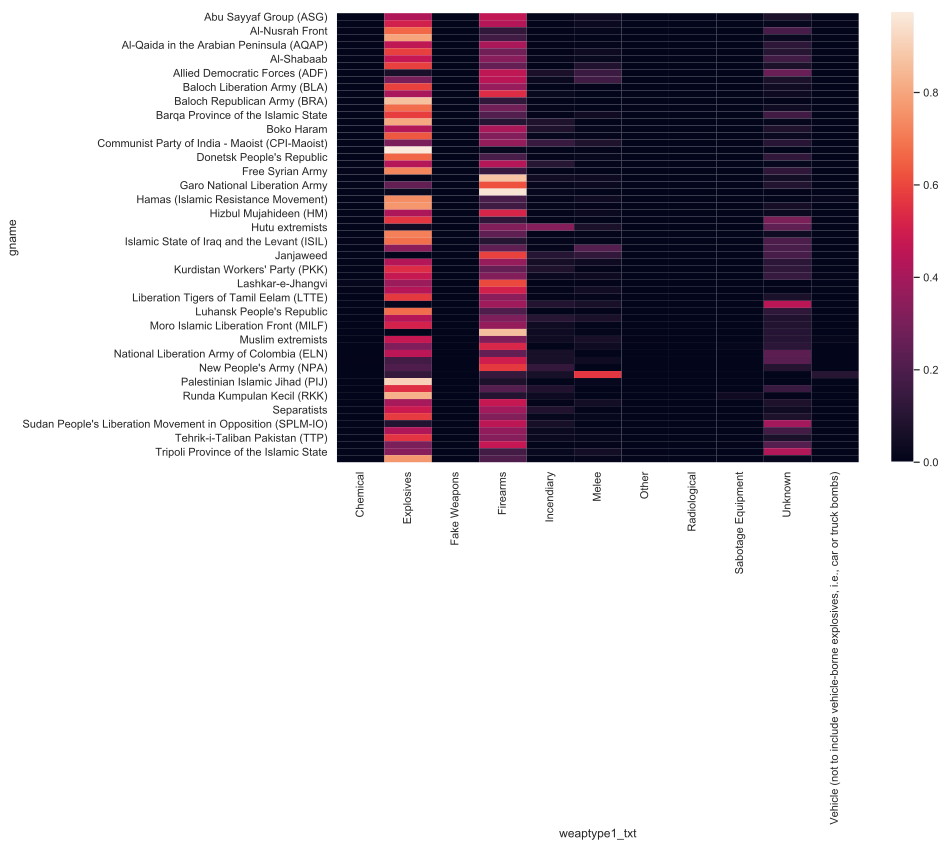

In [54]:
crosstab('gname', 'weaptype1_txt', False, filter_var1=100)

In [55]:
top_groups_post = data_post97.gname.value_counts()
top_groups_post = top_groups_post[top_groups_post >= 100]
top_groups_post = top_groups_post.drop('Unknown')

In [56]:
sums = data_post97.groupby('gname').sum()[['nkill', 'nwound', 'nkillter', 'nwoundte']]
sums = sums.select(lambda idx: idx in top_groups_post).sort_values(by='nkill', ascending=False)
sums = pd.DataFrame(sums)
sums.reset_index(inplace=True)
sums.head()

C:\Users\MariLiis\Anaconda3\envs\py33\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  


,gname,nkill,nwound,nkillter,nwoundte
0,Islamic State of Iraq and the Levant (ISIL),38923.0,30672.0,11452.0,939.0
1,Taliban,29410.0,27932.0,13254.0,6534.0
2,Boko Haram,20328.0,9473.0,6202.0,100.0
3,Al-Shabaab,9330.0,7624.0,2445.0,250.0
4,Tehrik-i-Taliban Pakistan (TTP),6042.0,9532.0,1112.0,177.0


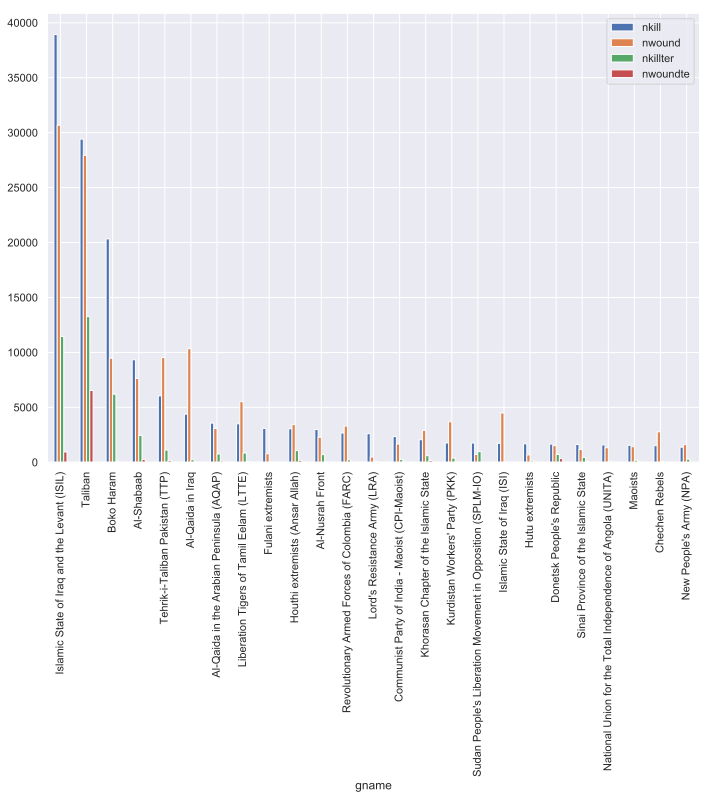

In [57]:
sums[:25].plot(x='gname', y=['nkill', 'nwound','nkillter', 'nwoundte'], kind="bar")

A not very surprising result, ISIS, Taliban and Boko Haram are the most fatal groups in this part.

## Kidnapping

The final section will look at some correlations related to kidnapping incidents.

In [58]:
# Filter out the data about kidnapping incidents
data_pre97_kh = data_pre97[data_pre97.ishostkid == 1]
data_post97_kh = data_post97[data_post97.ishostkid == 1]

In [60]:
# The overall percent of kidnapping incidents
round((len(data_pre97_kh) + len(data_post97_kh))/ len(data) * 100, 2) 

7.47

### 1970 - 1997

In [61]:
# The percent of kidnapping incidents in pre-1997 data
print(round(len(data_pre97_kh)/ len(data_pre97) * 100, 2))

# The percent of kidnapping incidents where ransom was demanded
print(round(len(data_pre97_kh[data_pre97_kh.ransom == 1]) / len(data_pre97_kh) * 100, 2))

6.03
15.73


In [62]:
# Replace weird values with NaN
data_pre97_kh.loc[data_pre97_kh.nhostkid == -99, "nhostkid"] = np.nan
data_pre97_kh.loc[data_pre97_kh.nreleased == -99, "nreleased"] = np.nan
data_post97_kh.loc[data_post97_kh.nhostkid == -99, "nhostkid"] = np.nan
data_post97_kh.loc[data_post97_kh.nreleased == -99, "nreleased"] = np.nan
data_pre97_kh.loc[data_pre97_kh.ransomamt == -99, "ransomamt"] = np.nan
data_pre97_kh.loc[data_pre97_kh.ransompaid == -99, "ransompaid"] = np.nan
data_post97_kh.loc[data_post97_kh.ransomamt == -99, "ransomamt"] = np.nan
data_post97_kh.loc[data_post97_kh.ransompaid == -99, "ransompaid"] = np.nan

C:\Users\MariLiis\Anaconda3\envs\py33\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [63]:
sums_hostkid_pre = data_pre97_kh.groupby('iyear').sum()[['nhostkid', 'ransompaid', 'ransomamt', 'nreleased']]
sums_hostkid_pre = pd.DataFrame(sums_hostkid_pre)
sums_hostkid_pre.reset_index(inplace=True)

We will now plot the number of kidnapped people ('nhostkid') and kidnapped people that were released ('nreleased') by year.

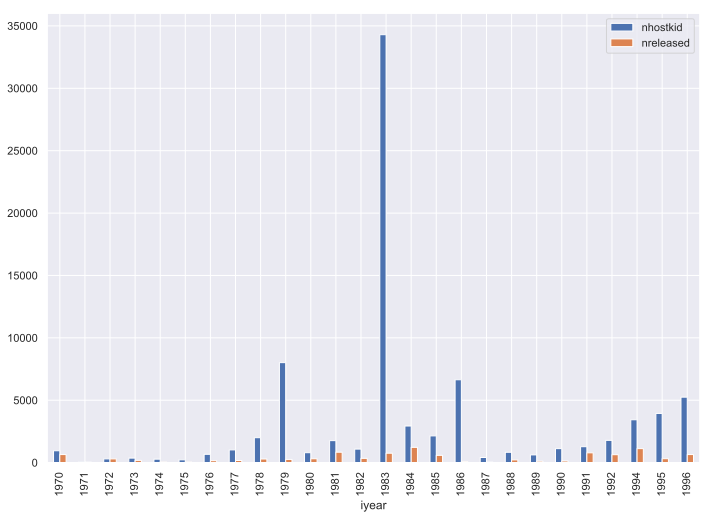

In [64]:
sums_hostkid_pre.plot(x='iyear', y=['nhostkid', 'nreleased'], kind="bar")

The remarkable 1983 case of almost 35,000 hostages seems dubious. Let's look at it more closely:

In [65]:
data_pre97_kh[(data_pre97_kh.iyear == 1983) & (data_pre97_kh.nhostkid > 100)][['eventid', 'country_txt', 'nhostkid', 'hostkidoutcome_txt']]

,eventid,country_txt,nhostkid,hostkidoutcome_txt
18698,198305080002,El Salvador,1000.0,NaN
19243,198307060009,Iran,390.0,Hostage(s) released by perpetrators
19363,198307220008,Nicaragua,189.0,Unknown
19550,198308190003,El Salvador,5000.0,NaN
19898,198310040003,El Salvador,10000.0,NaN
19899,198310040004,El Salvador,17000.0,NaN
20327,198311220004,El Salvador,150.0,NaN


This huge figure seems to be connected to the El Salvador civil war where numerous cases of kidnapping did occur.

We can also plot the amount of ransom demanded and paid per year.

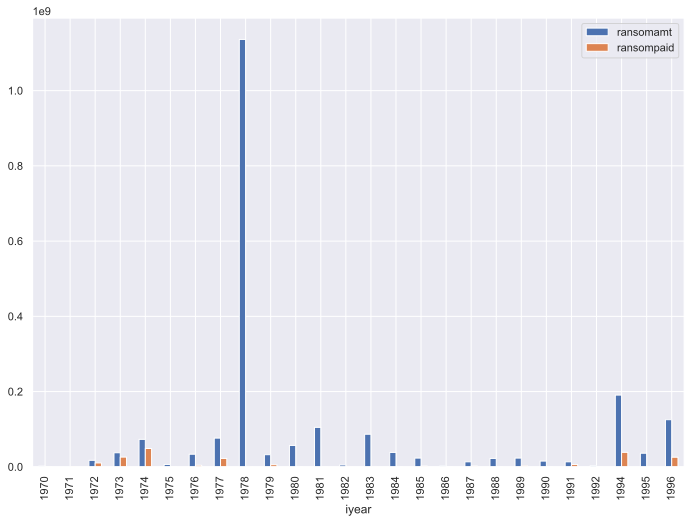

In [66]:
sums_hostkid_pre.plot(x='iyear', y=['ransomamt', 'ransompaid'], kind="bar")

In [67]:
data_pre97_kh[(data_pre97_kh.iyear == 1978) & (data_pre97_kh.nhostkid > 100)][['eventid', 'country_txt', 'nhostkid', 'ransomamt', 'ransompaid']]

,eventid,country_txt,nhostkid,ransomamt,ransompaid
6644,197808220002,Nicaragua,1200.0,10000000.0,500000.0


This enormous ransom amount may be related to an incident during the Sandinista Revolution in Nicaragua where a guerilla commando took over the National Palace in Managua, kidnapping congressmen and senators (https://vianica.com/go/specials/15-sandinista-revolution-in-nicaragua.html).

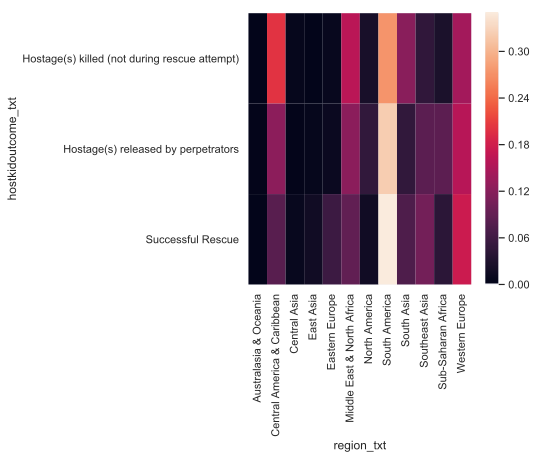

In [76]:
sns.set(rc={'figure.figsize':(5,5)})
crosstab('hostkidoutcome_txt', 'region_txt', True, filter_var1=100)

### 1997 - 2017

In [69]:
# The percent of kidnapping incidents in post-1997 data
print(round(len(data_post97_kh)/ len(data_post97) * 100, 2))

# The percent of kidnapping incidents where ransom was demanded
print(round(len(data_post97_kh[data_post97_kh.ransom == 1]) / len(data_post97_kh) * 100, 2))

8.26
6.71


In [70]:
sums_hostkid_post = data_post97_kh.groupby('iyear').sum()[['nhostkid', 'ransomamt', 'ransompaid', 'nreleased']]
sums_hostkid_post = pd.DataFrame(sums_hostkid_post)
sums_hostkid_post.reset_index(inplace=True)

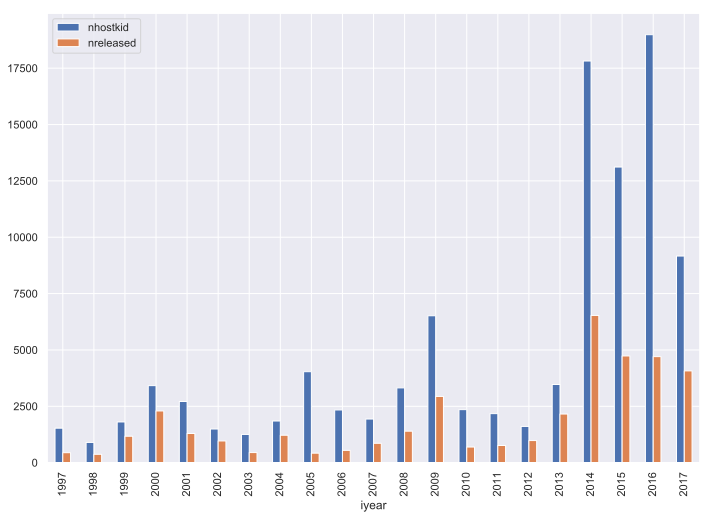

In [71]:
sums_hostkid_post.plot(x='iyear', y=['nhostkid', 'nreleased'], kind="bar")

The number of kidnapping incidents increases almost five-fold from 2013 to 2014. Most of these incidents take place in the Middle East:

In [72]:
data_post97_kh[(data_post97_kh.iyear.isin([2014, 2015, 2016, 2017])) & (data_post97_kh.nhostkid > 100)][['eventid', 'country_txt', 'nhostkid']]

,eventid,country_txt,nhostkid
130209,201404120029,Pakistan,110.0
130312,201404140009,Nigeria,276.0
132498,201405260214,Syria,153.0
132651,201405290033,Syria,193.0
133240,201406100062,Syria,150.0
133518,201406150063,Iraq,1686.0
133636,201406180047,Iraq,101.0
136283,201408090071,Iraq,5350.0
136561,201408150057,Iraq,1000.0
136746,201408200027,Syria,150.0


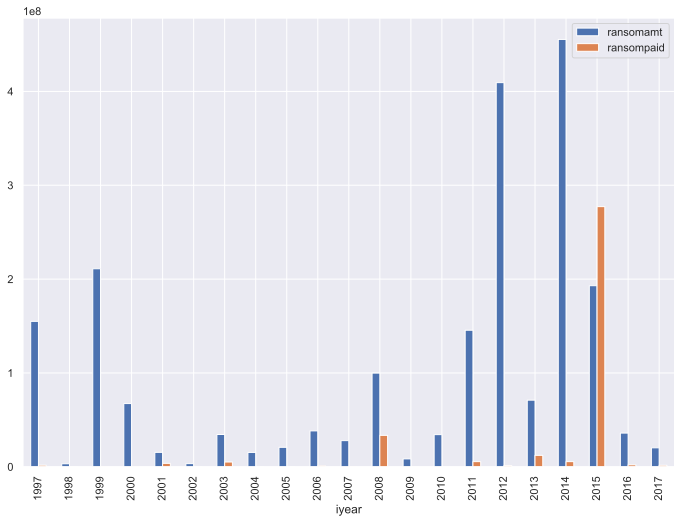

In [73]:
sums_hostkid_post.plot(x='iyear', y=['ransomamt', 'ransompaid'], kind="bar")

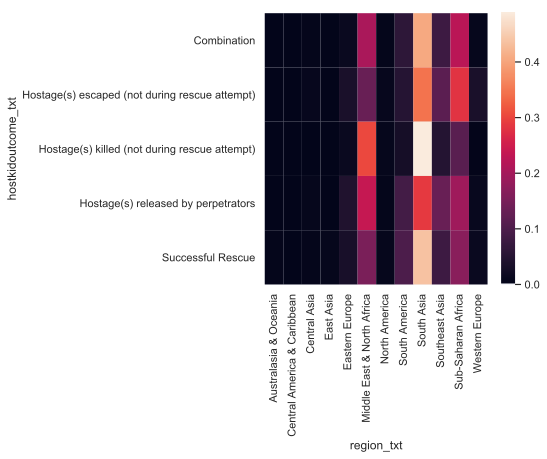

In [75]:
sns.set(rc={'figure.figsize':(5,5)})
crosstab('hostkidoutcome_txt', 'region_txt', False, filter_var1=100)

We can see that in most cases, the hostages did not survive in South Asia and Middle East, although there is also a significant part of successful rescues in the former region. 